In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
import sys
sys.path.append("/home/tom/coding/ExTRA/")
import ExTRApack as ex

ExTRA correctly imported


In [3]:
#standard epochs
J1991=2448349.0 #1991.25
J2000=2451545.0
J2016=2457389.0

In [4]:
#standard model:
#at J2016

asc=20
dec=-10
parallax=200
mu_a_star=-100
mu_d=+300

standard=np.array([asc,dec,parallax,mu_a_star,mu_d])

In [21]:
#orbital elements
P=550
e=0.3
om=np.radians(0)
i=np.radians(30)
Om=np.radians(75)
T0=J1991+900 #900 days after standard 1991
a=0.01
orbpar=np.array([P,e,om,i,Om,T0,a])


#timestamps of measurements
t_mock=np.linspace(T0-2*P,T0+2*P,100)










#orbit
t_orb=np.linspace(T0-2*P,T0+2*P,int(P/5))
mock_orbit=ex.orbit(*orbpar,t_orb)

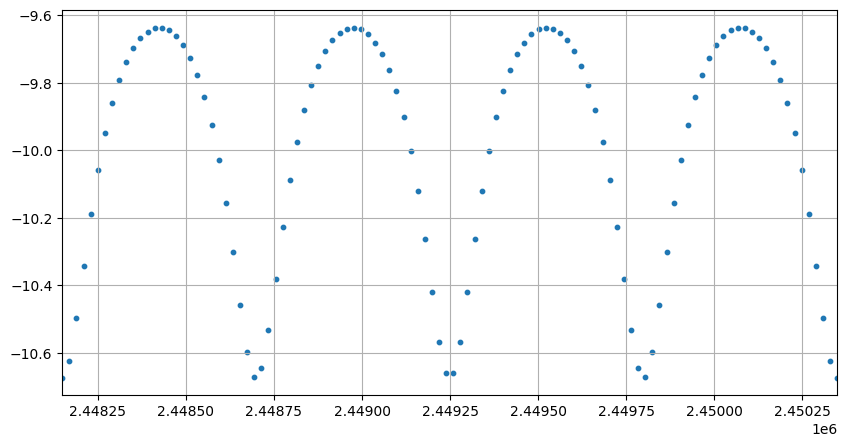

In [22]:
#rv
t_RV=np.linspace(T0-2*P,T0+2*P,int(P/5))

v=10

#RVdata
RV=ex.RV_comb(v,P,e,om,i,T0,a,parallax,t_RV)
#error
RV_err=np.ones(len(RV))*20



plt.figure(figsize=(10,5))
plt.scatter(t_RV,RV,s=10)
plt.xlim([t_RV[0],t_RV[-1]])
plt.grid()
plt.show()


In [23]:
def write_RV(data):
    with open('mock_RV.txt', mode='w') as file:
        for row in data:
            file.write("{:<10}\t{:<10}\t{:<10}\n".format(row[0], row[1], row[2]))

In [24]:
RV_data=np.array([t_RV,RV,RV_err])
RV_data=np.transpose(RV_data)
write_RV(RV_data)

In [25]:
#HIP
#motions
t_HIP=t_RV

earth=ex.earth_position(t_HIP)

std=np.array(ex.standard_model(asc,dec,parallax,mu_a_star,mu_d,t_HIP,earth,tangential=True))
orb=np.array(ex.orbit(P,e,om,i,Om,T0,a,t_HIP))
orb_mock=np.array(ex.orbit(P,e,om,i,Om-1.5,T0,a,t_HIP))
#motion=std+orb




#A3,A4,A5,A6,A7,A8,A9=hip_ad

angle=np.arctan2(orb[1],orb[0])

A8=np.sqrt(orb[0]**2 + orb[1]**2)
A9=abs(np.random.normal(np.std(A8),0.5*np.std(A8),len(A8)))

#A9=np.ones(len(A8))*np.std(A8)*0.25

A5=np.zeros(len(A8))


#X and Y
A3=1*np.cos(angle)
A4=1*np.sin(angle)

#year of mesaurement
epoch=(t_HIP-J2000)/365.25 +2000

#years after HIP stand epoch
frac=epoch-1991.25
A6=frac*A3
A7=frac*A4 #to A4 corresponding poper motion factor


HIP=A3,A4,A5,A6,A7,A8,A9

hip_standard=np.zeros(5)


hip_standard[0],hip_standard[1]=ex.pos_recalc(*[asc,dec,mu_a_star,mu_d],J2016,J1991)
#hip standard epoch is J1991


hip_standard[2:5]=np.array(standard[2:5])



In [11]:
def write_HIP(data):
    with open('mock_HIP.txt', mode='w') as file:
        for row in data:
            file.write("{:<10}\t{:<10}\t{:<10}\t{:<10}\t{:<10}\t{:<10}\t{:<10}\n".format(
                row[0], row[1], row[2],row[3],row[4],row[5],row[6],))
